# Title

## 1.0 Introduction

## 2.0 Data Description

### 2.1 Exploratory Data Analysis

Let us begin by loading the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data\winequality_red.csv')
print("Data Set Dimensionality" + str(df.shape))
df.head(5)

Data Set Dimensionality(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no NaNs in the dataset

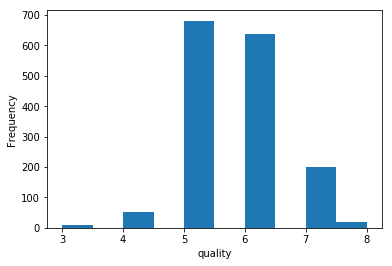

In [3]:
df["quality"].plot.hist()
plt.xlabel("quality")
plt.show()

Our target variable 'normality' can take values from 0 till 5. Luckily, we have highly balanced dataset. 

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


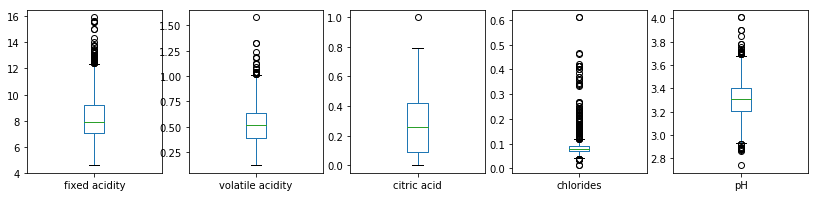

In [5]:
fig1, axs1 = plt.subplots(1, 5, figsize=(14, 3))
df["fixed acidity"].plot.box(ax=axs1[0])
df["volatile acidity"].plot.box(ax=axs1[1])
df["citric acid"].plot.box(ax=axs1[2])
df["chlorides"].plot.box(ax=axs1[3])
df["pH"].plot.box(ax=axs1[4])

From the box plot above we see that there are some outliers. In the below simple scheme, we identify and drop them.

In [7]:
# df.drop(df['frame.len'].idxmax(), inplace=True)
# df.drop(df['ip.len'].idxmax(), inplace=True)
# df.drop(df['tcp.len'].idxmax(), inplace=True)
# df.drop(df['Value'].idxmax(), inplace=True)
# df = df[df['ip.proto'] < 10]

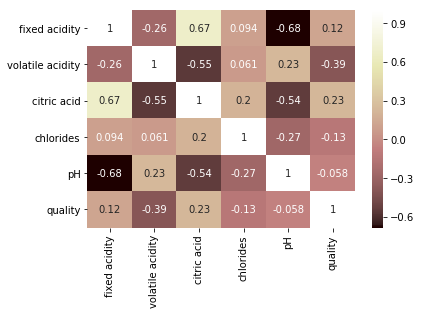

In [6]:
import seaborn as sns
dfcorr=df[['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH', 'quality']].corr()
sns.heatmap(dfcorr,annot=True,cmap='pink')
plt.show()

From the correlation plot above we can notice that columns 'frame.len', 'ip.proto', 'ip.len', 'tcp.len' have reasonable correlation with the target variable. There appears to be very high collinearity between columns 'ip.len' and 'tcp.len'.  

## 3.0 Model Search Framework

We have developed a model search framework for this project. Model search framework is a collection of model pipelines which is generated in combinatorial fashion. Given a dataset (X, y) our framework
validates upto 120 different model pipelines and systematically stores the results. Models to be generated can be controlled via experiment yml file.

Our objective here is to make use of as many ideas and concepts relevant to classification model development as possible for this project. Hence our framework generates several pipelines as combinations of the following:

- Preprocessing
    - Min-Max transform
    - Standard normal transform
    - No Preprocessing
- Dimensionality Reduction
    - PCA
    - Kernel PCA
    - Locally Linear Embedding    
    - No Dimensionality Reduction
- Classifiers
    - Logistic Regression
    - Naive Bayes
    - kNN
    - Random Forest
    - SVC
    - XGBoost 
    - AdaBoost
    - Gradient Boosting
    
Further, to decide on hyperparameters the framework carries out Grid Search with cross validation. Following hyperparameters are tuned:
- Dimensionality Reduction
    - PCA 
        - n_components
    - Kernel PCA 
        - n_components
    - Locally Linear Embedding
        - n_components
        - n_neighbors     
- Classifiers
    - Logistic Regression
        - penalty
        - C
        - class_weight
    - kNN
        - n_neighbors
        - weights
        - metric
    - Random Forest
        - max_depth
        - min_samples_split
        - n_estimators
    - XGBoost
        - learning_rate
        - n_estimators
    - AdaBoost
        - n_estimators
    - Gradient Boosting
        - learning_rate, n_estimators

The logic of the framework can be found in our github at https://github.com/VinGPan/Machine_Learning_3252_project/blob/master/src/s04_build_models.py

## 4.0 Feature Engineering

## 5.0 Results

### 5.1 Experiment 1 - 

Models build by our Model Search Framework is controlled via yml file. Below is the content of yml file for this experiment

In [ ]:
''' Content of experiments/exp_01.yml
experiment:
    name: 'exp1'
data:
    history: 0
    lead: 0
    cols: ['frame.len', 'ip.proto', 'ip.len', 'tcp.len', 'Value']
    target: 'normality'
models:
    classifiers: ['logistic', 'naive_bayes', 'knn', 'random_forest', 'xgboost', 'adaboost', 'gradboost', 'svc']
    preprocs: ['none', 'min_max', 'standard_scalar']
    transforms : ['none', 'pca'] 
'''

In [8]:
from src.model.utils import read_args, read_yml, makedir
from src.model.data_cleanup import cleanup
from src.model.compute_features import compute_features
from src.model.split import split
from src.model.build_models import build_models

exp_yml_path = 'experiments/exp_01.yml'
configs = read_yml(exp_yml_path)
makedir("output/" + configs['experiment_name'])

cleanup(configs)
compute_features(configs)
split(configs)
exp1_scores, exp1_top_scores = build_models(configs)

print("Top 3 classifiers")
exp1_top_scores

Top 3 classifiers


,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
0,xgboost,standard_scalar,pca,71.25,34.52834986015764,0.715205385951849
1,random_forest,standard_scalar,none,71.25,32.62140859394864,0.7153293377533343
2,xgboost,none,none,67.5,31.807780320366135,0.6842437374082945


### 5.2 Experiment 2 - 

Below is the content of yml file for this experiment

In [ ]:
''' Content of experiments/exp_02.yml
experiment:
    name: 'exp2'
data:
    history: 5
    lead: 10
    cols: ['frame.len', 'ip.proto', 'ip.len', 'tcp.len', 'Value']
    target: 'normality'
models:
    classifiers: ['logistic', 'naive_bayes', 'knn', 'random_forest', 'xgboost', 'adaboost', 'gradboost', 'svc']
    preprocs: ['none', 'min_max', 'standard_scalar']
    transforms : ['none', 'pca']
'''

In [9]:
# exp_yml_path = 'experiments/exp_02.yml'
# configs = read_yml(exp_yml_path)
# makedir("output/" + configs['experiment_name'])

# cleanup(configs)
# compute_features(configs)
# split(configs)
# exp1_scores, exp1_top_scores = build_models(configs)

# print("Top 3 classifiers")
# exp1_top_scores

### 5.6 Comparison

Above figure provides graphical summary of accuracies over 5 experiments. 

### 5.7 Final Model Selection and Test Results

In [10]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(
    y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, return_cm=False,
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)

    if not title:
        title = "Confusion matrix"

    # Compute confusion matrix

    cm = confusion_matrix(y_true, y_pred, labels=classes)


    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        cm = np.nan_to_num(cm)
        print("Normalized confusion matrix")
    if return_cm:
        return cm

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel="True label",
        xlabel="Predicted label",
    )

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
            )
    fig.tight_layout()
    return ax

Test accuracy = 68.1%, balanced accuracy = 38.3%, F1 = 0.69


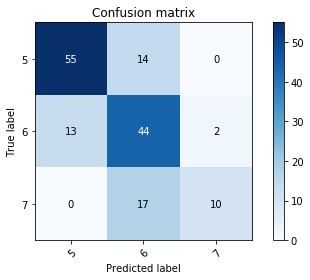

In [29]:
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
import numpy as np
from src.model.deploy import prepare_test_data


exp_yml_name = 'experiments/exp_01.yml'
X_test, y_test = prepare_test_data(exp_yml_name)

model_path = 'output/exp1/random_forest_none_none.pkl'

clf = joblib.load(model_path)
test_preds = clf.predict(X_test)
accuracy = round(accuracy_score(y_test, test_preds) * 100, 1)
bal_accuracy = round(balanced_accuracy_score(y_test, test_preds) * 100, 1)
f1 = round(f1_score(y_test, test_preds, average='weighted', labels=np.unique(test_preds)), 2)
res_str = ('Test accuracy = ' + str(accuracy) + '%, balanced accuracy = ' + str(bal_accuracy) 
           +'%, F1 = ' + str(f1))
print(res_str)

disp = plot_confusion_matrix(y_test, test_preds, classes=np.sort(np.unique(test_preds)))

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test[test_preds != 3], test_preds[test_preds != 3], np.sort(np.unique(test_preds))))

              precision    recall  f1-score   support

           5       0.77      0.80      0.79        69
           6       0.57      0.75      0.65        59
           7       0.83      0.37      0.51        27

   micro avg       0.68      0.70      0.69       155
   macro avg       0.73      0.64      0.65       155
weighted avg       0.71      0.70      0.69       155



# Appendix

## A. Experiment 1 Model Scores

### A.1 Logistic Regression Results 

In [20]:
exp1_scores[exp1_scores.classifier == 'logistic'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
32,logistic,min_max,kpca,42.5,17.696414950419527,0.38429290867020555
18,logistic,min_max,none,52.5,26.01067887109077,0.5487398018648018
20,logistic,min_max,pca,51.87500000000001,25.133485888634628,0.5477775621118012
35,logistic,none,kpca,32.5,12.560386473429952,0.26039039039039036
22,logistic,none,none,51.87500000000001,24.497838799898297,0.5465272902646668
21,logistic,none,pca,53.125,24.980930587337912,0.5590209471766848
15,logistic,standard_scalar,kpca,48.125,26.862445969997456,0.4777844199514291
16,logistic,standard_scalar,none,52.5,26.6463259598271,0.5503714470284238
13,logistic,standard_scalar,pca,51.87500000000001,27.67607424357996,0.5291987211303024


### A.2 Naive Bayes Results 

In [21]:
# exp1_scores[exp1_scores.classifier == 'naive_bayes'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score


### A.3 KNN Results

In [23]:
# exp1_scores[exp1_scores.classifier == 'knn'].sort_values(by=['preprocess', 'transform'])

### A.4 Random Forest Results

In [24]:
exp1_scores[exp1_scores.classifier == 'random_forest'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
12,random_forest,min_max,kpca,63.74999999999999,28.451563691838295,0.6347082361654143
7,random_forest,min_max,none,69.375,31.261123824052888,0.6948413271311152
5,random_forest,min_max,pca,66.875,31.56623442664633,0.6730847637991356
23,random_forest,none,kpca,56.25,23.64607170099161,0.5535550694786364
10,random_forest,none,none,68.125,30.778032036613272,0.6829620724334446
6,random_forest,none,pca,70.0,31.502669717772697,0.6992540530866909
11,random_forest,standard_scalar,kpca,63.125,29.48131197559115,0.6327511662980736
2,random_forest,standard_scalar,none,71.25,32.62140859394864,0.7153293377533343
8,random_forest,standard_scalar,pca,68.75,31.01957793033308,0.6873689193949205


### A.5 XGBoost Results

In [25]:
exp1_scores[exp1_scores.classifier == 'xgboost'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
14,xgboost,min_max,kpca,58.12500000000001,26.913297737096364,0.580259796567972
4,xgboost,min_max,none,67.5,31.807780320366135,0.6842437374082945
19,xgboost,min_max,pca,59.375,25.48944825832698,0.5880909702112235
24,xgboost,none,kpca,51.24999999999999,21.713704551233157,0.4974162403227075
3,xgboost,none,none,67.5,31.807780320366135,0.6842437374082945
9,xgboost,none,pca,66.875,30.930587337909994,0.6699546570942755
17,xgboost,standard_scalar,kpca,57.49999999999999,26.036104754640228,0.5731966360325992
1,xgboost,standard_scalar,none,68.125,32.68497330282227,0.6916818285773544
0,xgboost,standard_scalar,pca,71.25,34.52834986015764,0.715205385951849


### A.6 Adaboost Results

In [26]:
# exp1_scores[exp1_scores.classifier == 'adaboost'].sort_values(by=['preprocess', 'transform'])

### A.7 Gradboost Results

In [27]:
# exp1_scores[exp1_scores.classifier == 'gradboost'].sort_values(by=['preprocess', 'transform'])

### A.8 SVC Results

In [28]:
exp1_scores[exp1_scores.classifier == 'svc'].sort_values(by=['preprocess', 'transform'])

,classifier,preprocess,transform,accuracy,balanced_accuracy,f1_score
31,svc,min_max,kpca,34.375,17.73455377574371,0.3933287559060581
26,svc,min_max,none,38.75,20.696669209255024,0.45451192182084776
25,svc,min_max,pca,41.25,21.662852784134245,0.47939120848609845
33,svc,none,kpca,30.625000000000004,14.378337147215866,0.26215272563862485
29,svc,none,none,38.75,19.425375031782355,0.4528127906976744
30,svc,none,pca,38.75,19.425375031782355,0.4528127906976744
34,svc,standard_scalar,kpca,27.500000000000004,13.806254767353165,0.3323785053162198
28,svc,standard_scalar,none,36.875,19.972031528095602,0.43317301105224704
27,svc,standard_scalar,pca,37.5,20.21357742181541,0.4433603970434327


## B. Experiment 2  Model Scores

### B.1 Logistic Regression Results 

In [12]:
# exp2_scores[exp2_scores.classifier == 'logistic'].sort_values(by=['preprocess', 'transform'])

### B.2 Naive Bayes Results 

In [13]:
# exp2_scores[exp2_scores.classifier == 'naive_bayes'].sort_values(by=['preprocess', 'transform'])

### B.3 KNN Results

In [14]:
# exp2_scores[exp2_scores.classifier == 'knn'].sort_values(by=['preprocess', 'transform'])

### B.4 Random Forest Results

In [15]:
# exp2_scores[exp2_scores.classifier == 'random_forest'].sort_values(by=['preprocess', 'transform'])

### B.5 XGBoost Results

In [16]:
# exp2_scores[exp2_scores.classifier == 'xgboost'].sort_values(by=['preprocess', 'transform'])

### B.6 Adaboost Results

In [17]:
# exp2_scores[exp2_scores.classifier == 'adaboost'].sort_values(by=['preprocess', 'transform'])

### B.7 Gradboost Results

In [18]:
# exp2_scores[exp2_scores.classifier == 'gradboost'].sort_values(by=['preprocess', 'transform'])

### B.8 SVC Results

In [19]:
# exp2_scores[exp2_scores.classifier == 'svc'].sort_values(by=['preprocess', 'transform'])